In [53]:
%matplotlib inline

from netCDF4 import Dataset, num2date
from dateutil.parser import *
import os
import numpy as np

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

In [3]:
data_file = os.path.join('/Volumes/NiftyDrive/Research/data/ECMWF-20C.nc')
with Dataset(data_file) as F:
    dates = num2date(F.variables['time'][:], F.variables['time'].units)
    temps = F.variables['t2m'][:]
    latitude = F.variables['latitude'][:]
    longitude = F.variables['longitude'][:]

In [4]:
t0 = 273.15

In [17]:
month = 7
pre = (1900, 1910)
post = (2000, 2010)

In [6]:
temperature.shape

(181, 360)

In [7]:
lons, lats = np.meshgrid(longitude, latitude)

In [32]:
months = np.array([d.month for d in dates])
years = np.array([d.year for d in dates])

pre_mask = (months == month) & (years >= pre[0]) & (years < pre[1])
post_mask = (months == month) & (years >= post[0]) & (years < post[1])

july_1900 = temps[pre_mask,:,:].mean(axis=0).squeeze() - t0
july_2000 = temps[post_mask,:,:].mean(axis=0).squeeze() - t0

delta_t = july_2000 - july_1900
delta_t.shape

(181, 360)

In [51]:
def make_basemap(ax):
    m = Basemap(ax=ax, projection='robin', lon_0=0, resolution='c')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90.,99.,30.))
    m.drawmeridians(np.arange(-180.,180.,60.))
    
    return m, ax

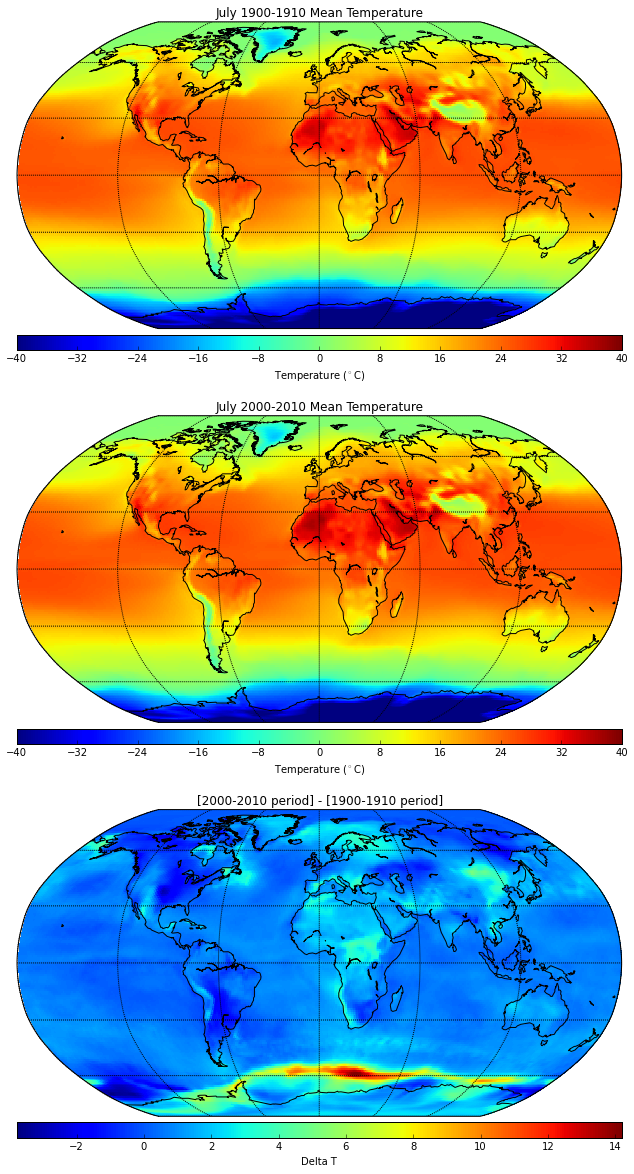

In [89]:
fig, ax = plt.subplots(3, figsize=(15, 20))

m, ax[0] = make_basemap(ax[0])
im = m.pcolormesh(lons, lats, july_1900, latlon=True,
                  vmin=-40, vmax=40)
cb = m.colorbar(im, 'bottom', size='5%', pad='2%')
cb.set_label('Temperature ($^\circ$C)')
ax[0].set_title("July 1900-1910 Mean Temperature")

m, ax[1] = make_basemap(ax[1])
im = m.pcolormesh(lons, lats, july_2000, latlon=True,
                  vmin=-40, vmax=40)
cb = m.colorbar(im, 'bottom', size='5%', pad='2%')
cb.set_label('Temperature ($^\circ$C)')
ax[1].set_title("July 2000-2010 Mean Temperature")

m, ax[2] = make_basemap(ax[2])
im = m.pcolormesh(lons, lats, delta_t, latlon=True)
cb = m.colorbar(im, 'bottom', size='5%', pad='2%')
cb.set_label('Delta T')
ax[2].set_title("[2000-2010 period] - [1900-1910 period]")

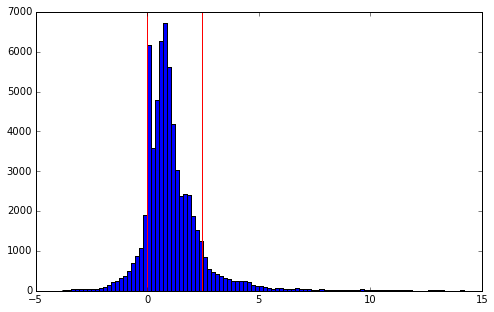

In [90]:
fig, ax = plt.subplots(figsize=(8, 5))

counts, bins, patches = ax.hist(delta_t.ravel(), bins=100)
upper_percentile = np.percentile(delta_t.ravel(), 90)
lower_percentile = np.percentile(delta_t.ravel(), 10)
ax.plot([upper_percentile, upper_percentile], ax.get_ylim(), 'r-')
ax.plot([lower_percentile, lower_percentile], ax.get_ylim(), 'r-')

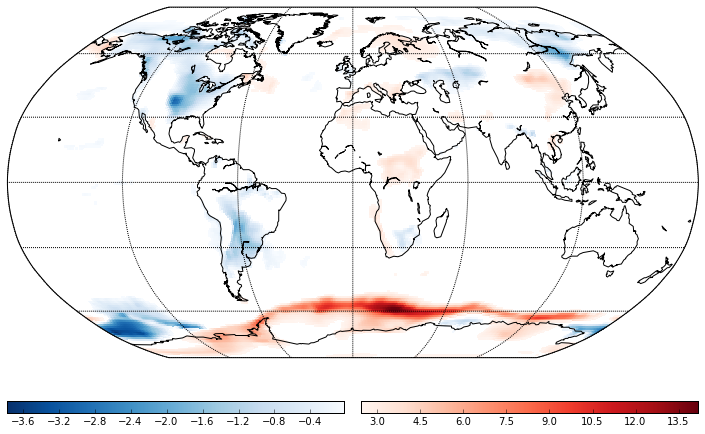

In [88]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0.1, 0.05, 0.8, 0.8])
m, ax = make_basemap(ax)

upper_data = np.ma.masked_less(delta_t, upper_percentile)
lower_data = np.ma.masked_greater(delta_t, lower_percentile)

um = m.pcolormesh(lons, lats, upper_data, latlon=True, cmap=cm.Reds,)
                 #vmin=upper_percentile, vmax=max(delta_t.ravel()))

lm = m.pcolormesh(lons, lats, lower_data, latlon=True, cmap=cm.Blues_r,)
                 #vmin=min(delta_t.ravel()), vmax=lower_percentile)
ucax = fig.add_axes([.51, .05, .39, .02])
ucb = fig.colorbar(um, cax=ucax, orientation='horizontal', )

lcax = fig.add_axes([.1, .05, .39, .02])
lcb = fig.colorbar(lm, cax=lcax, orientation='horizontal')

In [61]:
upper_data.any()

True

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 12))

# m = Basemap(ax=ax, projection='robin', lon_0=0, resolution='c')
# m.drawcoastlines()
# m.drawparallels(np.arange(-90.,99.,30.))
# m.drawmeridians(np.arange(-180.,180.,60.))
# im = m.pcolormesh(lons, lats, temps[0,:,:].squeeze()-t0, latlon=True,
#                   vmin=-40, vmax=40)
# cb = m.colorbar(im, 'bottom', size='5%', pad='2%', ax=ax)
# cb.set_label('Temperature ($^\circ$C)')

# def init():
#     im.set_array([])
#     ax.set_title('')
#     return im, ax

# def animate(i):
#     t = m.pcolormesh(lons, lats, temps[i,:,:].squeeze()-t0, latlon=True, vmin=-40, vmax=40)
#     im.set_array(t.get_array())
#     ax.set_title("2 meter Surface Temperature\n{}".format(dates[i].strftime('%Y %b')))
    
#     return im, ax

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=len(dates), interval=1)
# anim.save('1990-2010_Temperature_Map.mp4', fps=12, extra_args=['-vcodec', 'libx264'])

KeyboardInterrupt: 